In [1]:
import tasks_reader.tasks_reader_facade as tasks_reader_facade
import task_row_filter
import normal_distribution_printer

In [2]:
path_to_file = "test_tasks.xlsx"
sheet_name = "tasks"
first_row = 4
last_row = 13
rows_to_skip = '6,9:11'
columns_mapping = {
    'uid': 'A',
    'name': 'B',
    'min_estimate': 'E',
    'normal_estimate': 'F',
    'max_estimate': 'G'
}

all_tasks = tasks_reader_facade.read_from_excel(file=path_to_file, 
                                            sheet=sheet_name, 
                                            first_row=first_row,
                                            last_row=last_row,
                                            columns_mapping=columns_mapping, 
                                            rows_to_skip=rows_to_skip)

print('Read {} tasks'.format(len(all_tasks)))

Read 6 tasks


In [3]:
valid_tasks = task_row_filter.filter_task_rows(all_tasks, 
                                               [task_row_filter.MinEstimateRequiredPredicate(),
                                                task_row_filter.NormalEstimateRequiredPredicate(),
                                                task_row_filter.MaxEstimateRequiredPredicate()])

print('Valid {} tasks'.format(len(valid_tasks)))

Task with uid: 'TASK-3' was filtered due to: ['min_estimate field is required', 'normal_estimate field is required', 'max_estimate field is required']
Task with uid: 'TASK-6' was filtered due to: ['min_estimate field is required', 'max_estimate field is required']
Valid 4 tasks


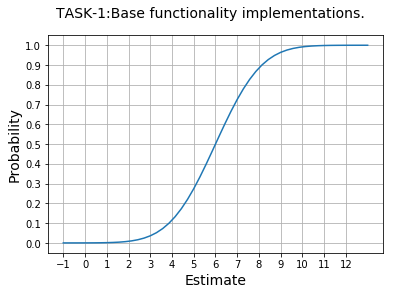

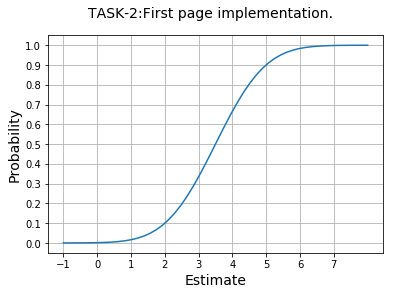

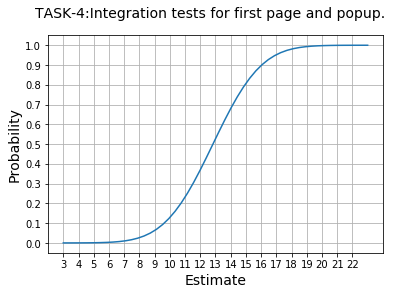

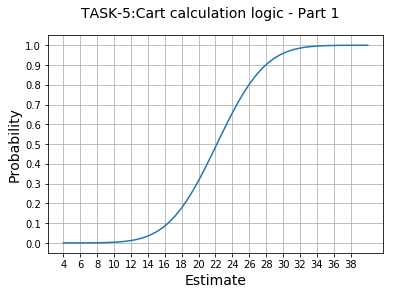

In [4]:
for task in valid_tasks:
    normal_distribution_printer.print_normal_distribution_for_task(task)

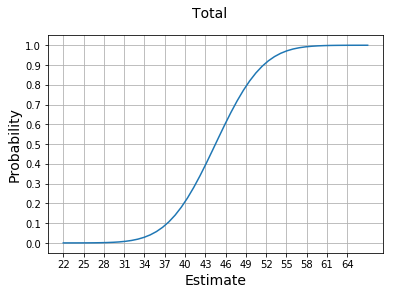

In [5]:
normal_distribution_printer.print_normal_distribution_for_tasks(valid_tasks)